In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
raw_data=pd.read_csv("1.03.+Dummies.csv")
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


As Attendence is a categorial data, We are using the "Dummy variables" to replicate them.
so,       "Yes" is mapped to 1 and 
           "No" is mapped to 0

In [3]:
data=raw_data.copy()

In [4]:
data["Attendance"]=data["Attendance"].map({"Yes":1,"No":0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [5]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


We can see that the Mean of the Attendence is 0.46.So,It indicates that 0's are more than 1's

# Regression

In [6]:
y=data["GPA"]
x1=data[['SAT','Attendance']]

Adding the constant to x1

In [7]:
x=sm.add_constant(x1)

In [8]:
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           2.19e-15
Time:                        22:51:09   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

we can see that SAT,Attendance are significant in determining the GPA of the students.

## From the table,we get GPA=0.6439+0.0014*SAT+ 0.2226*Dummy (By observing the coeff in the OLS table).
### so,for Yes put 1 and for No put 0 in Dummy 
    Yes:GPA=0.86+0.014*SAT
    No:GPA=0.64+0.014*SAT

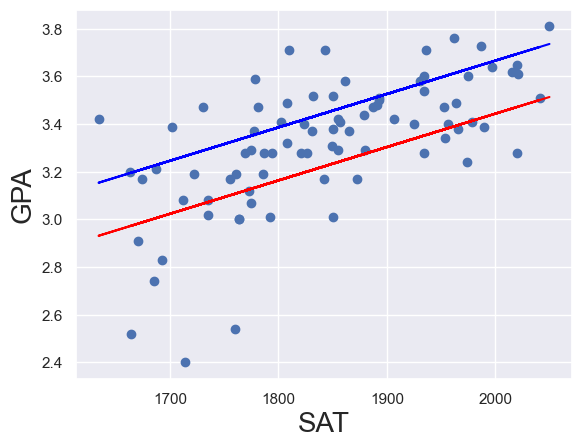

In [9]:
#plotting 
plt.scatter(data['SAT'],y)

#x-axis->SAT 
#y-axis->GPA 
y_yes=0.8665+0.0014*data['SAT']
y_no=0.6439+0.0014*data['SAT']

#ploting yes
plt.plot(data['SAT'],y_yes,c='blue')

#ploting no 
plt.plot(data['SAT'],y_no,c='red')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20) 
plt.show()

Blue line refers to the GPA of the Attended students 

Red line refers to the GPA of the not-Atended students 
    
    so, we can see that attended students got the higher GPA than the Non-Attended Students 

## Making predictions with Linear regression 

In [10]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


### lets, create a dataframe of two students: Raja,Rani 

    raju,who got 1700 on SAT and didnt attended the classes 
    Rani,who got 1670 on SAT and attended the classes   
and predict their GPA
    

In [11]:
new_data=pd.DataFrame({'const':1,"SAT":[1700,1670],"Attendance":[0,1]})
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [12]:
new_data.rename(index={0:'Raju',1:'Rani'})

,const,SAT,Attendance
Raju,1,1700,0
Rani,1,1670,1


In [13]:
#prediction 
predictions=results.predict(new_data)
predictions_df=pd.DataFrame({"prediction":predictions})
predictions_df

,prediction
0,3.023513
1,3.204163


## CONCLUSION: So,we can see that Rani, who has lesser SAT score than the Raju is going get higher GPA by attending the classes